In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import normalize
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
bottles = ["1", "2", "3", "6", "7", "8", "4", "9", "10"]
features = ["Time", "PAR", "Y(II)", "Y(NPQ)", "Y(NO)", "NPQ", "qN", "qP", "qL", "ETR"]  
reps = ["1", "2", "3", "4", "5"]
temp_df = []
for rep in reps:
    for bottle in bottles:
        LC_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Light Curves (MC-PAM)\\Day5 Rep{}\\".format(rep)
        try:
            lc_data = pd.read_csv(LC_DIR + "PB{}.csv".format(bottle), sep=";", encoding='cp1252')
        except:
            lc_data = pd.read_csv(LC_DIR + "PB{}.csv".format(bottle), sep=",", encoding='cp1252')

        x = lc_data.loc[:, features].values[4:-2]
        lc_dataframe = pd.DataFrame(x, columns=features)
        
        lc_dataframe['Bottle_Num'] = pd.Series(np.repeat(bottle, len(lc_dataframe["Y(II)"])), index=lc_dataframe.index)
        
    
        temp_df.append(lc_dataframe)
        lc_dataframe['Rep'] = pd.Series(np.repeat(rep, len(lc_dataframe["Y(II)"])), index=lc_dataframe.index)
    
combdf = pd.concat(temp_df)
combdf.reset_index(drop=True, inplace=True)
combdf.head()

,Time,PAR,Y(II),Y(NPQ),Y(NO),NPQ,qN,qP,qL,ETR,Bottle_Num,Rep
0,8:13:29,1,0.692,0.006,0.302,0.02,0.026,0.974,0.916,0.3,1,1
1,7:04:44,2,0.696,0.004,0.3,0.014,0.018,0.976,0.921,0.6,1,1
2,7:05:14,11,0.657,0.007,0.336,0.022,0.028,0.923,0.777,3,1,1
3,7:05:44,31,0.541,0.014,0.445,0.032,0.04,0.763,0.484,7,1,1
4,7:06:14,55,0.491,0.028,0.481,0.058,0.07,0.698,0.406,11.4,1,1


In [3]:
# Ps = Maximum photosynthetic rate
# Alpha = Photosynthetic efficiency
# Beta = Photoinhibition parameter
# Ek = Ps / Alpha = Minimum Saturating Irradiance (Light Saturation Index)
# Below Ek photosynthetic reations are dominated by alpha, and above Ek photosynthesis is govened by beta

def platt_fit(x, Ps, alpha, beta):
    return Ps*(1-np.exp(-alpha*x.astype(float)/Ps))*(np.exp(-beta*x.astype(float)/Ps))

Ps, alpha, beta, Ek = [], [], [], []

for bottle in bottles:
    init_ps, init_alpha, init_beta, init_ek = [], [], [], []
    for rep in reps:
        get_lc = combdf[(combdf["Bottle_Num"] == str(bottle)) & (combdf["Rep"] == str(rep))]

        popt, pcov = curve_fit(platt_fit, get_lc["PAR"].astype(float), get_lc["ETR"].astype(float), bounds=(0, [400., 2., 2.]))

        init_ps.append(popt[0])
        init_alpha.append(popt[1])
        init_beta.append(popt[2])
        init_ek.append(popt[0] / popt[1])

        
    Ps.append(init_ps)
    alpha.append(init_alpha)
    beta.append(init_beta)
    Ek.append(init_ek)

In [4]:
psWhite = (np.array(Ps[0]) + np.array(Ps[1]) + np.array(Ps[2])) /3
psRgb = (np.array(Ps[3]) + np.array(Ps[4]) + np.array(Ps[5])) /3
psRb = (np.array(Ps[6]) + np.array(Ps[7]) + np.array(Ps[8])) /3

alphaWhite = (np.array(alpha[0]) + np.array(alpha[1]) + np.array(alpha[2])) /3
alphaRgb = (np.array(alpha[3]) + np.array(alpha[4]) + np.array(alpha[5])) /3
alphaRb = (np.array(alpha[6]) + np.array(alpha[7]) + np.array(alpha[8])) /3

betaWhite = (np.array(beta[0]) + np.array(beta[1]) + np.array(beta[2])) /3
betaRgb = (np.array(beta[3]) + np.array(beta[4]) + np.array(beta[5])) /3
betaRb = (np.array(beta[6]) + np.array(beta[7]) + np.array(beta[8])) /3

ekWhite = (np.array(Ek[0]) + np.array(Ek[1]) + np.array(Ek[2])) /3
ekRgb = (np.array(Ek[3]) + np.array(Ek[4]) + np.array(Ek[5])) /3
ekRb = (np.array(Ek[6]) + np.array(Ek[7]) + np.array(Ek[8])) /3

psWstd = []
psRGBstd = []
psRBstd = []

alphaWstd =[] 
alphaRGBstd =[] 
alphaRBstd = []

betaWstd = []
betaRGBstd = []
betaRBstd = []

ekWstd = []
ekRGBstd = []
ekRBstd = []

for i in range(len(psWhite)):
    psWstd.append(np.std([Ps[0][i], Ps[1][i], Ps[2][i]]))
    psRGBstd.append(np.std([Ps[3][i], Ps[4][i], Ps[5][i]]))
    psRBstd.append(np.std([Ps[6][i], Ps[7][i], Ps[8][i]]))
    
    alphaWstd.append(np.std([alpha[0][i], alpha[1][i], alpha[2][i]]))
    alphaRGBstd.append(np.std([alpha[3][i], alpha[4][i], alpha[5][i]]))
    alphaRBstd.append(np.std([alpha[6][i], alpha[7][i], alpha[8][i]]))
    
    betaWstd.append(np.std([beta[0][i], beta[1][i], beta[2][i]]))
    betaRGBstd.append(np.std([beta[3][i], beta[4][i], beta[5][i]]))
    betaRBstd.append(np.std([beta[6][i], beta[7][i], beta[8][i]]))
    
    ekWstd.append(np.std([Ek[0][i], Ek[1][i], Ek[2][i]]))
    ekRGBstd.append(np.std([Ek[3][i], Ek[4][i], Ek[5][i]]))
    ekRBstd.append(np.std([Ek[6][i], Ek[7][i], Ek[8][i]]))

In [5]:
# Get LC_Average Data
lc_df = pd.read_excel("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\LC_Combined.xlsx")
lc_df = lc_df.dropna()
lc_df.reset_index(drop=True, inplace=True)

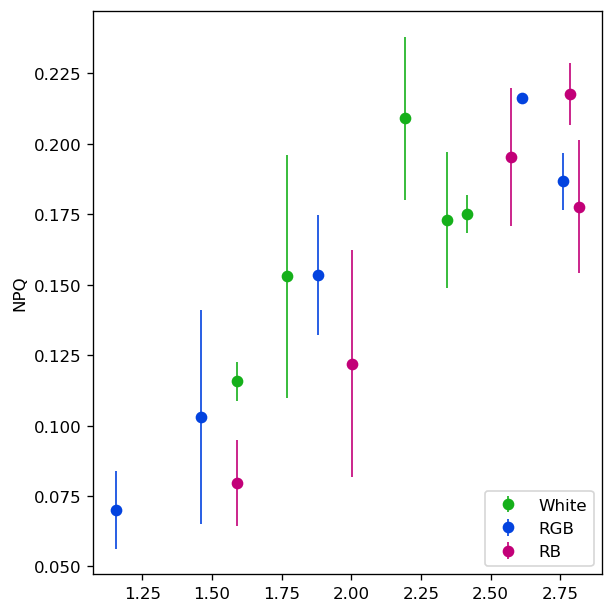

In [10]:
white_param, rgb_param, rb_param = [], [], []
white_err, rgb_err, rb_err = [], [], []
param_of_interest = "NPQ"
err_of_interest = param_of_interest + "StDev"
point_of_interest = 20
colors = ["xkcd:green", "xkcd:blue", "xkcd:magenta"]
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]

ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]

white_area = [2.193833333, 1.768166666, 1.5911666655, 2.417166667, 2.3421666670000003]
rgb_area = [2.6128333335000002, 1.8796666665, 1.156000002, 1.4598333349999997, 2.7603333325]
rb_area = [2.7838333345, 2.5749999975, 1.5891666665000002, 2.004333335, 2.8171666675]

reps = [1, 2, 3, 4, 5]
for rep in reps:
    white_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "WHITE")][param_of_interest])[point_of_interest])
    rgb_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RGB")][param_of_interest])[point_of_interest])
    rb_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RB")][param_of_interest])[point_of_interest])
    white_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "WHITE")][err_of_interest])[point_of_interest])
    rgb_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RGB")][err_of_interest])[point_of_interest])
    rb_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RB")][err_of_interest])[point_of_interest])
    
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True, dpi=120)
ax.errorbar(white_area, white_param, yerr=white_err, color=colors[0], marker="o", label="White", elinewidth=1, linestyle="none")
ax.errorbar(rgb_area, rgb_param, yerr=rgb_err, color=colors[1], marker="o", label="RGB", elinewidth=1, linestyle="none")
ax.errorbar(rb_area, rb_param, yerr=rb_err, color=colors[2], marker="o", label="RB", elinewidth=1, linestyle="none")
ax.set_ylabel(param_of_interest)
# ax.set_xlabel("Measurement Interval")
# ax.set_xticks(reps)
# ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend(loc="lower right") 
# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Revised Figures\\NPQ.png", dpi=300)

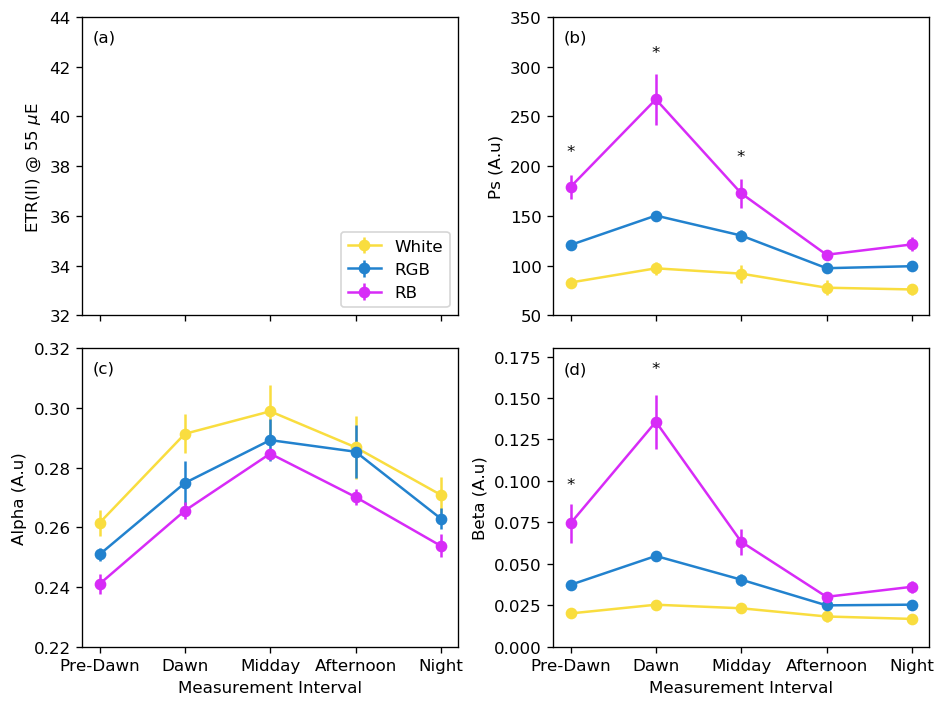

In [7]:
# Ps = Maximum photosynthetic rate
# Alpha = Photosynthetic efficiency
# Beta = Photoinhibition parameter
# Ek = Ps / Alpha = Minimum Saturating Irradiance (Light Saturation Index)
# Below Ek photosynthetic reations are dominated by alpha, and above Ek photosynthesis is govened by beta
white_param, rgb_param, rb_param = [], [], []
white_err, rgb_err, rb_err = [], [], []
param_of_interest = "ETR(II)"
err_of_interest = "ETR(II)StDev"
point_of_interest = 5

reps = [1, 2, 3, 4, 5]
for rep in reps:
    white_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "WHITE")][param_of_interest])[point_of_interest])
    rgb_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RGB")][param_of_interest])[point_of_interest])
    rb_param.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RB")][param_of_interest])[point_of_interest])
    white_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "WHITE")][err_of_interest])[point_of_interest])
    rgb_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RGB")][err_of_interest])[point_of_interest])
    rb_err.append(np.array(lc_df[(lc_df["Rep"] == rep) & (lc_df["Light"] == "RB")][err_of_interest])[point_of_interest])

treatment_c = ["#f9dd3f", "#2282ce", "#d72bf7"]
x_vals = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), dpi=120, sharex=True)

axes[0,0].errorbar(x_vals, white_param, yerr=white_err, color=treatment_c[0], marker="o", label="White")
axes[0,0].errorbar(x_vals, rgb_param, yerr=rgb_err, color=treatment_c[1], marker="o", label="RGB")
axes[0,0].errorbar(x_vals, rb_param, yerr=rb_err, color=treatment_c[2], marker="o", label="RB")
axes[0,0].set_ylabel("ETR(II) @ 55 $\mu$E")
axes[0,0].set_ylim(32, 44)
axes[0,0].legend(loc="lower right") 
axes[0,0].text(-0.08, 43, "(a)")

axes[0,1].errorbar(x_vals, psWhite, yerr=psWstd, marker="o", color=treatment_c[0])
axes[0,1].errorbar(x_vals, psRgb, yerr=psRGBstd, marker="o", color=treatment_c[1])
axes[0,1].errorbar(x_vals, psRb, yerr=psRBstd, marker="o", color=treatment_c[2])
axes[0,1].set_ylabel("Ps (A.u)")
axes[0,1].set_ylim(50, 350)
axes[0,1].text(-0.05, 210, "*")
axes[0,1].text(0.95, 310, "*")
axes[0,1].text(1.95, 205, "*")
axes[0,1].text(-0.08, 325, "(b)")

axes[1,0].errorbar(x_vals, alphaWhite, yerr=alphaWstd, marker="o", color=treatment_c[0])
axes[1,0].errorbar(x_vals, alphaRgb, yerr=alphaRGBstd, marker="o", color=treatment_c[1])
axes[1,0].errorbar(x_vals, alphaRb, yerr=alphaRBstd, marker="o", color=treatment_c[2])
axes[1,0].set_ylim(0.22, 0.32)
axes[1,0].set_ylabel("Alpha (A.u)")
axes[1,0].text(-0.08, 0.312, "(c)")

axes[1,1].errorbar(x_vals, betaWhite, yerr=betaWstd, marker="o", color=treatment_c[0])
axes[1,1].errorbar(x_vals, betaRgb, yerr=betaRGBstd, marker="o", color=treatment_c[1])
axes[1,1].errorbar(x_vals, betaRb, yerr=betaRBstd, marker="o", color=treatment_c[2])
axes[1,1].set_ylabel("Beta (A.u)")
axes[1,1].set_ylim(0, 0.18)
axes[0, 0].tick_params(axis='y', which='minor', bottom=False)
axes[1,1].text(-0.08, 0.165, "(d)")

axes[1,1].set_xlabel("Measurement Interval")
axes[1,0].set_xlabel("Measurement Interval")
axes[1,1].text(-0.05, 0.095, "*")
axes[1,1].text(0.95, 0.165, "*")
plt.tight_layout()

#plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figure4.png", dpi=300)

In [15]:
PARAMS_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Phenobottle Parameters Chapter 4\\"
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density", "temperature", "LIGHT_INTENSITY","fo", 
            "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
            "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"] 
ojip_arr = []
for bottle in bottles:
    ojip_data = pd.read_csv(PARAMS_DIR + "PB{}Params.csv".format(bottle), sep=",", encoding='cp1252', names=parameters)
    ojip_data['Bottle_Num'] = pd.Series(np.repeat(bottle, len(ojip_data["day_night"])), index=ojip_data.index)
    ojip_arr.append(ojip_data)
    
    
ojipdf = pd.concat(ojip_arr)
ojipdf.reset_index(drop=True, inplace=True)

ojipdf

,sql_time,day_night,od_raw,transmittance,optical_density,temperature,LIGHT_INTENSITY,fo,f_300us,fj,...,fi_fo,fi_fj,fm_fi,fo_od,fj_od,fi_od,fm_od,variable_fluorescence_od,fm_qa_od,Bottle_Num
0,2020/03/30 13:26:32,N/a,0,0.00,0.000,0,220,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1
1,2020/03/30 13:30:45,Day,3151,77.14,0.113,0,220,0.147,0.177,0.186,...,0.050,0.011,0.004,1.301,1.646,1.743,1.779,0.478,NaN,1
2,2020/03/30 13:40:45,Day,3130,76.62,0.116,0,220,0.526,0.847,1.250,...,1.015,0.291,0.045,4.534,10.776,13.284,13.672,9.138,NaN,1
3,2020/03/30 13:50:44,Day,3013,73.76,0.132,0,220,0.226,0.359,0.490,...,0.356,0.092,0.020,1.712,3.712,4.409,4.561,2.848,NaN,1
4,2020/03/30 14:00:44,Day,3072,75.20,0.124,0,220,0.200,0.310,0.417,...,0.283,0.066,0.016,1.613,3.363,3.895,4.024,2.411,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,2020/04/14 21:20:40,Night,1303,44.92,0.348,0,0,0.297,0.419,0.713,...,0.618,0.202,0.087,0.853,2.049,2.629,2.879,2.026,NaN,10
19921,2020/04/14 21:30:40,Night,1304,44.95,0.347,0,0,0.297,0.418,0.712,...,0.615,0.200,0.087,0.856,2.052,2.628,2.879,2.023,NaN,10
19922,2020/04/14 21:40:41,Night,1306,45.02,0.347,0,0,0.298,0.418,0.711,...,0.612,0.199,0.086,0.859,2.049,2.622,2.870,2.012,NaN,10
19923,2020/04/14 21:50:41,Night,1303,44.92,0.348,0,0,0.297,0.419,0.711,...,0.613,0.199,0.084,0.853,2.043,2.615,2.856,2.003,NaN,10


In [ ]:
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density", "temperature", "LIGHT_INTENSITY","fo", 
            "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
            "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"] 

In [13]:
sigmaPath = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Sigma_Averages.csv"
sigmadf = pd.read_csv(sigmaPath)
sigmadf.head()

,Rep,WhiteAv,WhiteStDev,RGBAv,RGBStDev,RBAv,RBStDev,Wavelength
0,1,3.007,0.028,2.884,0.063,2.941,0.036,440
1,1,2.362,0.027,2.260,0.055,2.284,0.027,480
2,1,0.716,0.008,0.686,0.020,0.678,0.015,540
3,1,1.291,0.014,1.263,0.042,1.254,0.033,590
4,1,1.585,0.014,1.590,0.031,1.559,0.033,625


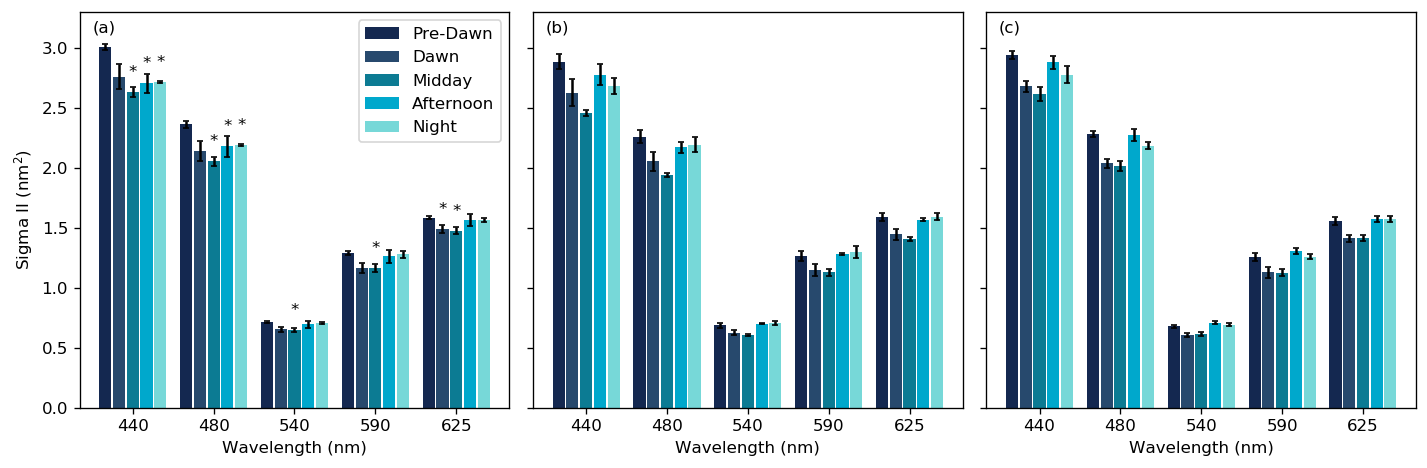

In [189]:
fig, (ax, ax1, ax2) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3, dpi=120, sharey=True)
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
wavelengths = ["440", "480", "540", "590", "625"]
width = 0.15
gap = 0.02


x = np.arange(len(wavelengths))

whiteBar = ax.bar(x-width-width-gap-gap, sigmadf.query('Rep == "1"')["WhiteAv"], width, 
                  yerr=sigmadf.query('Rep == "1"')["WhiteStDev"], capsize=2, color="#142850", label=labels[0])
whiteBar1 = ax.bar(x-width-gap, sigmadf.query('Rep == "2"')["WhiteAv"], width, 
                   yerr=sigmadf.query('Rep == "2"')["WhiteStDev"], capsize=2, color="#27496d", label=labels[1])
whiteBar2 = ax.bar(x, sigmadf.query('Rep == "3"')["WhiteAv"], width, 
                   yerr=sigmadf.query('Rep == "3"')["WhiteStDev"], capsize=2, color="#0c7b93", label=labels[2])
whiteBar3 = ax.bar(x+width+gap, sigmadf.query('Rep == "4"')["WhiteAv"], width, 
                   yerr=sigmadf.query('Rep == "4"')["WhiteStDev"], capsize=2, color="#00a8cc", label=labels[3])
whiteBar4 = ax.bar(x+width+width+gap+gap, sigmadf.query('Rep == "5"')["WhiteAv"], width, 
                   yerr=sigmadf.query('Rep == "5"')["WhiteStDev"], capsize=2, color="#77d8d8", label=labels[4])

rgbBar = ax1.bar(x-width-width-gap-gap, sigmadf.query('Rep == "1"')["RGBAv"], width, 
                 yerr=sigmadf.query('Rep == "1"')["RGBStDev"], capsize=2, color="#142850")
rgbBar1 = ax1.bar(x-width-gap, sigmadf.query('Rep == "2"')["RGBAv"], width, 
                  yerr=sigmadf.query('Rep == "2"')["RGBStDev"], capsize=2, color="#27496d")
rgbBar2 = ax1.bar(x, sigmadf.query('Rep == "3"')["RGBAv"], width, 
                  yerr=sigmadf.query('Rep == "3"')["RGBStDev"], capsize=2, color="#0c7b93")
rgbBar3 = ax1.bar(x+width+gap, sigmadf.query('Rep == "4"')["RGBAv"], width, 
                  yerr=sigmadf.query('Rep == "4"')["RGBStDev"], capsize=2, color="#00a8cc")
rgbBar4 = ax1.bar(x+width+width+gap+gap, sigmadf.query('Rep == "5"')["RGBAv"], width, 
                  yerr=sigmadf.query('Rep == "5"')["RGBStDev"], capsize=2, color="#77d8d8")

rbBar = ax2.bar(x-width-width-gap-gap, sigmadf.query('Rep == "1"')["RBAv"], width, 
                yerr=sigmadf.query('Rep == "1"')["RBStDev"], capsize=2, color="#142850")
rbBar1 = ax2.bar(x-width-gap, sigmadf.query('Rep == "2"')["RBAv"], width, 
                 yerr=sigmadf.query('Rep == "2"')["RBStDev"], capsize=2, color="#27496d")
rbBar2 = ax2.bar(x, sigmadf.query('Rep == "3"')["RBAv"], width, 
                 yerr=sigmadf.query('Rep == "3"')["RBStDev"], capsize=2, color="#0c7b93")
rbBar3 = ax2.bar(x+width+gap, sigmadf.query('Rep == "4"')["RBAv"], width, 
                 yerr=sigmadf.query('Rep == "4"')["RBStDev"], capsize=2, color="#00a8cc")
rbBar4 = ax2.bar(x+width+width+gap+gap, sigmadf.query('Rep == "5"')["RBAv"], width, 
                 yerr=sigmadf.query('Rep == "5"')["RBStDev"], capsize=2, color="#77d8d8")

rects = ax.patches
labels = np.arange(len(rects))

whiteSigValues = [rects[9], rects[10], rects[11], rects[12], rects[13], rects[14], rects[15],rects[16], rects[20], rects[21]]

for rect, label in zip(rects, labels):
    # White 
    if rect in whiteSigValues:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.1, "*",
                ha='center', va='bottom')


ax.set_ylim(0, 3.3)
ax.text(-0.5, 3.13, s="(a)")
ax1.text(x=-0.5, y = 3.13, s="(b)")
ax2.text(x=-0.5, y = 3.13, s="(c)")

ax.set_xticks(x)
ax1.set_xticks(x)
ax2.set_xticks(x)

ax.set_xlabel("Wavelength (nm)")
ax1.set_xlabel("Wavelength (nm)")
ax2.set_xlabel("Wavelength (nm)")

ax.set_xticklabels(wavelengths)
ax1.set_xticklabels(wavelengths)
ax2.set_xticklabels(wavelengths)
ax.set_ylabel("Sigma II (nm$^2$)")

plt.subplots_adjust(wspace=0)
ax.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figure2.png", dpi=300)

ValueError: x and y must be the same size

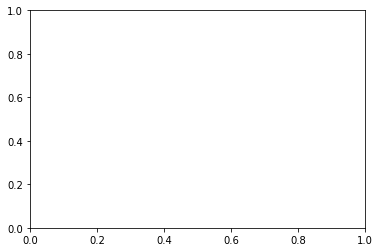

In [190]:
dates = ["2020/04/04 06:30", "2020/04/04 11:30", "2020/04/04 15:40", "2020/04/04 18:00", "2020/04/04 22:50"]
valueOfInterest = "fo_od"
whiteValue, rgbValue, rbValue = [], [], []
whiteRep1, whiteRep2, whiteRep3 = [], [], []
rgbRep1, rgbRep2, rgbRep3 = [], [], []
rbRep1, rbRep2, rbRep3 = [], [], []

# (ojipdf["fm"][i] - ojipdf["fj"][i]) / ojipdf["optical_density"][i] 

for i in range(len(ojipdf)):
    if ojipdf["sql_time"][i][:16] in dates:
        if ojipdf["Bottle_Num"][i] == str(1):
            whiteRep1.append((ojipdf[valueOfInterest][i]))
            
        if ojipdf["Bottle_Num"][i] == str(2):
            whiteRep2.append((ojipdf[valueOfInterest][i]))
            
        if ojipdf["Bottle_Num"][i] == str(3):
            whiteRep3.append((ojipdf[valueOfInterest][i]))
            
        if ojipdf["Bottle_Num"][i] == str(6):
            rgbRep1.append((ojipdf[valueOfInterest][i]))   
            
        if ojipdf["Bottle_Num"][i] == str(7):
            rgbRep2.append((ojipdf[valueOfInterest][i]))   
        
        if ojipdf["Bottle_Num"][i] == str(8):
            rgbRep3.append((ojipdf[valueOfInterest][i]))   
            
        if ojipdf["Bottle_Num"][i] == str(4):
            rbRep1.append((ojipdf[valueOfInterest][i]))
            
        if ojipdf["Bottle_Num"][i] == str(9):
            rbRep2.append((ojipdf[valueOfInterest][i]))
            
        if ojipdf["Bottle_Num"][i] == str(10):
            rbRep3.append((ojipdf[valueOfInterest][i]))
    else:
        pass

whiteValue = (np.array(whiteRep1) + np.array(whiteRep2) + np.array(whiteRep3)) / 3
rgbValue = (np.array(rgbRep1) + np.array(rgbRep2) + np.array(rgbRep3)) / 3
rbValue = (np.array(rbRep1) + np.array(rbRep2) + np.array(rbRep3)) / 3

whiteError, rgbError, rbError = [], [], []
for i in range(len(whiteRep1)):
    whiteError.append(np.std([whiteRep1[i], whiteRep2[i], whiteRep2[i]]))
    rgbError.append(np.std([rgbRep1[i], rgbRep2[i], rgbRep2[i]]))
    rbError.append(np.std([rbRep1[i], rbRep2[i], rbRep2[i]]))

plt.scatter(whiteValue, sigmadf.query('Wavelength == "440"')["WhiteAv"])
plt.scatter(rgbValue, sigmadf.query('Wavelength == "440"')["RGBAv"])
plt.scatter(rbValue, sigmadf.query('Wavelength == "440"')["RBAv"])
plt.xlabel(valueOfInterest)
plt.ylabel("Sigma nm$^2$")

In [48]:
# Calculated Average of Entire OJIP trend for each light treatment 
bottles = [1, 2, 3, 4, 6, 7, 8, 9, 10]
colors = ["red", "green", "blue", "orange", "magenta", "yellow", "black", "brown", "cyan"]
OJIP_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\\"

dates = ["2020/04/04 07:20", "2020/04/04 11:30", "2020/04/04 15:40", "2020/04/04 19:50", "2020/04/04 22:30"]

whiteBottles = [1, 2, 3]
rgbBottles = [6, 7, 8]
rbBottles = [4, 9, 10]

whiteRep1, whiteRep2, whiteRep3 = [], [], []
rgbRep1, rgbRep2, rgbRep3 = [], [], []
rbRep1, rbRep2, rbRep3 = [], [], []

for bottle in bottles:
    try:
        ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                              "value_ojip", "norm_ojip"])     
        for i in range(len(ojip_data)):
            if ojip_data["sql_time"][i][:16] in dates:
                if bottle in whiteBottles:
                    value_ojip = [float(s) for s in ojip_data["norm_ojip"][i].split(",")]
                    if bottle == 1:
                        whiteRep1.append(value_ojip)
                    if bottle == 2:
                        whiteRep2.append(value_ojip)  
                    if bottle == 3:
                        whiteRep3.append(value_ojip)  

                if bottle in rgbBottles:
                    value_ojip = [float(s) for s in ojip_data["norm_ojip"][i].split(",")]
                    if bottle == 6:
                        rgbRep1.append(value_ojip)
                    if bottle == 7:
                        rgbRep2.append(value_ojip)    
                    if bottle == 8:
                        rgbRep3.append(value_ojip)    

                if bottle in rbBottles:
                    value_ojip = [float(s) for s in ojip_data["norm_ojip"][i].split(",")]
                    if bottle == 4:
                        rbRep1.append(value_ojip)
                    if bottle == 9:
                        rbRep2.append(value_ojip)
                    if bottle == 10:
                        rbRep3.append(value_ojip)  
            else:
                pass
    except KeyError:
        pass
    
whiteAvOjip1 = (np.array(whiteRep1[0]) + np.array(whiteRep2[0]) + np.array(whiteRep3[0])) / 3
rgbAvOjip1 = (np.array(rgbRep1[0]) + np.array(rgbRep2[0]) + np.array(rgbRep3[0])) / 3
rbAvOjip1 = (np.array(rbRep1[0]) + np.array(rbRep2[0]) + np.array(rbRep3[0])) / 3   
    
whiteAvOjip2 = (np.array(whiteRep1[1]) + np.array(whiteRep2[1]) + np.array(whiteRep3[1])) / 3
rgbAvOjip2 = (np.array(rgbRep1[1]) + np.array(rgbRep2[1]) + np.array(rgbRep3[1])) / 3
rbAvOjip2 = (np.array(rbRep1[1]) + np.array(rbRep2[1]) + np.array(rbRep3[1])) / 3     
    
whiteAvOjip3 = (np.array(whiteRep1[2]) + np.array(whiteRep2[2]) + np.array(whiteRep3[2])) / 3
rgbAvOjip3 = (np.array(rgbRep1[2]) + np.array(rgbRep2[2]) + np.array(rgbRep3[2])) / 3
rbAvOjip3 = (np.array(rbRep1[2]) + np.array(rbRep2[2]) + np.array(rbRep3[2])) / 3     
    
whiteAvOjip4 = (np.array(whiteRep1[3]) + np.array(whiteRep2[3]) + np.array(whiteRep3[3])) / 3
rgbAvOjip4 = (np.array(rgbRep1[3]) + np.array(rgbRep2[3]) + np.array(rgbRep3[3])) / 3
rbAvOjip4 = (np.array(rbRep1[3]) + np.array(rbRep2[3]) + np.array(rbRep3[3])) / 3     

whiteAvOjip5 = (np.array(whiteRep1[4]) + np.array(whiteRep2[4]) + np.array(whiteRep3[4])) / 3
rgbAvOjip5 = (np.array(rgbRep1[4]) + np.array(rgbRep2[4]) + np.array(rgbRep3[4])) / 3
rbAvOjip5 = (np.array(rbRep1[4]) + np.array(rbRep2[4]) + np.array(rbRep3[4])) / 3 

whiteComb = [whiteAvOjip1, whiteAvOjip2, whiteAvOjip3, whiteAvOjip4, whiteAvOjip5]
rgbComb = [rgbAvOjip1, rgbAvOjip2, rgbAvOjip3, rgbAvOjip4, rgbAvOjip5]
rbComb = [rbAvOjip1, rbAvOjip2, rbAvOjip3, rbAvOjip4, rbAvOjip5]

# for i in range(len(whiteRep1[0])):
#     whiteOjipStdev.append(np.std([whiteRep1[0][i], whiteRep2[0][i], whiteRep3[0]]))

# np.std([whiteRep1[1][i], whiteRep2[1][i], whiteRep3[1]]),
# np.std([whiteRep1[2][i], whiteRep2[2][i], whiteRep3[2]]),
# np.std([whiteRep1[3][i], whiteRep2[3][i], whiteRep3[3]]),
# np.std([whiteRep1[4][i], whiteRep2[4][i], whiteRep3[4]]))                          

In [167]:
whiteS1, whiteS2, whiteS3, whiteS4, whiteS5 = [], [], [], [], []
rgbS1, rgbS2, rgbS3, rgbS4, rgbS5 = [], [], [], [], []
rbS1, rbS2, rbS3, rbS4, rbS5 = [], [], [], [], []
for i in range(len(whiteRep1[0])):
    whiteS1.append(np.std([whiteRep1[0][i], whiteRep2[0][i], whiteRep3[0][i]]))
    whiteS2.append(np.std([whiteRep1[1][i], whiteRep2[1][i], whiteRep3[1][i]]))
    whiteS3.append(np.std([whiteRep1[2][i], whiteRep2[2][i], whiteRep3[2][i]]))
    whiteS4.append(np.std([whiteRep1[3][i], whiteRep2[3][i], whiteRep3[3][i]]))
    whiteS5.append(np.std([whiteRep1[4][i], whiteRep2[4][i], whiteRep3[4][i]]))
    
    rgbS1.append(np.std([rgbRep1[0][i], rgbRep2[0][i], rgbRep3[0][i]]))
    rgbS2.append(np.std([rgbRep1[1][i], rgbRep2[1][i], rgbRep3[1][i]]))
    rgbS3.append(np.std([rgbRep1[2][i], rgbRep2[2][i], rgbRep3[2][i]]))
    rgbS4.append(np.std([rgbRep1[3][i], rgbRep2[3][i], rgbRep3[3][i]]))
    rgbS5.append(np.std([rgbRep1[4][i], rgbRep2[4][i], rgbRep3[4][i]]))

    rbS1.append(np.std([rbRep1[0][i], rbRep2[0][i], rbRep3[0][i]]))
    rbS2.append(np.std([rbRep1[1][i], rbRep2[1][i], rbRep3[1][i]]))
    rbS3.append(np.std([rbRep1[2][i], rbRep2[2][i], rbRep3[2][i]]))
    rbS4.append(np.std([rbRep1[3][i], rbRep2[3][i], rbRep3[3][i]]))
    rbS5.append(np.std([rbRep1[4][i], rbRep2[4][i], rbRep3[4][i]]))
    
whiteOjipStdev = [whiteS1, whiteS2, whiteS3, whiteS4, whiteS5]
rgbOjipStdev = [rgbS1, rgbS2, rgbS3, rgbS4, rgbS5]
rbOjipStdev = [rbS1, rbS2, rbS3, rbS4, rbS5]    
    

In [12]:
lcdf = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Y_NO_Included_LC_Av.csv")
lcdf.head(25)

,PAR,Y(II),Y(II)StDev,Y(NPQ),Y(NPQ)StDev,Y(NO),Y(NO)StDev,NPQ,NPQStDev,qN,qNStDev,qP,qPStDev,qL,qLStDev,ETR,ETRStDev,Treatment,Rep
0,0,0.714667,0.001247,0.000000,0.000000,0.285333,0.001247,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,White,1
1,1,0.691667,0.000471,0.005667,0.000471,0.302667,0.000943,0.018333,0.002357,0.023667,0.003300,0.973667,0.000471,0.915000,0.001414,0.300000,0.000000,White,1
2,2,0.694333,0.001700,0.005333,0.001886,0.300333,0.002867,0.018333,0.005437,0.022667,0.006600,0.976667,0.002494,0.923333,0.007134,0.600000,0.000000,White,1
3,11,0.648333,0.007846,0.008667,0.001700,0.343000,0.007257,0.025667,0.004497,0.032333,0.005437,0.913667,0.009286,0.755667,0.021638,2.966667,0.047140,White,1
4,31,0.529000,0.012961,0.016333,0.001700,0.454667,0.012284,0.035667,0.002867,0.044333,0.003300,0.748000,0.017146,0.465333,0.021638,6.900000,0.141421,White,1
5,55,0.485333,0.007318,0.028333,0.000471,0.486333,0.006848,0.057667,0.000471,0.070000,0.000000,0.690667,0.009672,0.399000,0.009899,11.233333,0.169967,White,1
6,80,0.476667,0.005793,0.038667,0.001700,0.484667,0.006944,0.079000,0.004243,0.094000,0.004967,0.682333,0.008179,0.393000,0.008981,16.033333,0.169967,White,1
7,114,0.474333,0.006600,0.047667,0.003091,0.478000,0.009416,0.100333,0.008957,0.116333,0.008957,0.682667,0.009741,0.396667,0.011728,22.700000,0.294392,White,1
8,150,0.470667,0.007846,0.054000,0.004320,0.474667,0.012037,0.115000,0.012083,0.131333,0.012552,0.680333,0.013021,0.396333,0.014974,29.666667,0.492161,White,1
9,195,0.452667,0.009843,0.061667,0.005437,0.485667,0.013816,0.127000,0.014353,0.143333,0.014055,0.656667,0.015521,0.372333,0.017308,37.066667,0.821922,White,1


NameError: name 'whiteComb' is not defined

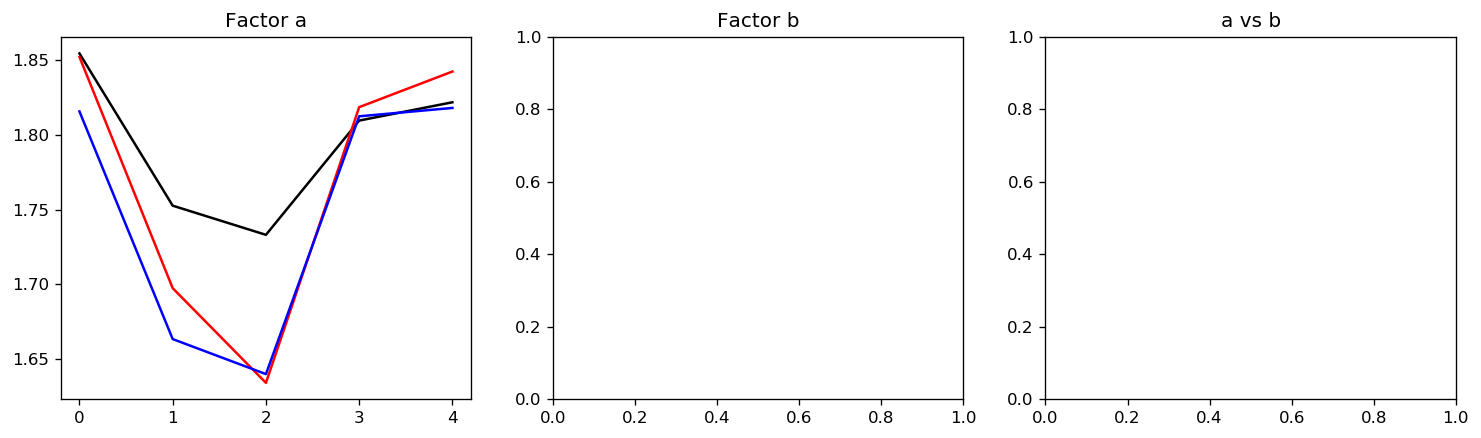

In [47]:
colors = ["White", "RGB", "RB"]
checkedValues = ["Y(NPQ)", "Y(II)", "NPQ", "qN"]
possibleCorrelation = ["Y(II) = 20", "qP = 20"]

valueOfInterest = "Y"
stdOfInterest = "ETR(II)StDev"
position = 2
reps = [1, 2, 3, 4, 5]
timePoint = 1999

correctedWhite = [62.1,70.93333,68.76667,60.5,59.46667]
correctedRgb = [76.3,86.13333,84.03333,71.1,70.93333]
correctedRb = [86.1, 99.53333, 95.36667, 74.86667, 77.93333]

ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]

maxWhite, maxRgb, maxRb = [], [], []
stdWhite, stdRgb, stdRb = [], [], []

for rep in reps:
    for color in colors:
        lcSelection = lcdf.loc[(lcdf["Rep"] == rep) & (lcdf["Treatment"] == color)]
        lcStd = lcdf.loc[(lcdf["Rep"] == rep) & (lcdf["Treatment"] == color)]
        lcSelection = np.array(lcSelection[valueOfInterest])
        lcStd = np.array(lcStd[stdOfInterest])
        lcSelection = lcSelection[~np.isnan(lcSelection)]
        lcStd = lcStd[~np.isnan(lcStd)]
        if color == colors[0]:
            maxWhite.append(lcSelection[position])
            stdWhite.append(lcStd[position])
        if color == colors[1]:
            maxRgb.append(lcSelection[position])
            stdRgb.append(lcStd[position])
        if color == colors[2]:
            maxRb.append(lcSelection[position])
            stdRb.append(lcStd[position])

blue_shade = ["#142850", "#27496d", "#0c7b93", "#00a8cc", "#77d8d8"]
yellow_shade = ["#ffd10f", "#e5bc0d", "#cca70c", "#b2920a", "#997d09"]
purple_shade = ["#6600ed", "#7519ee", "#8432f0", "#934cf2", "#a366f4"]            
            
startInterval = 1300
endInterval = 1700

dayTime = [0, 1, 2, 3, 4]

# def fit_decay(x, y0, A1, t1):
#     return y0 + A1 * np.exp(-x.astype(float)/t1)

# fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=120)

# tauDecayW = []
# for day in dayTime:
#     popt, pcov = curve_fit(fit_decay, np.array(x_time[startInterval:endInterval]), np.array(whiteComb[day][startInterval:endInterval]), bounds=(0, [1., 3., 400.]))
#     tauDecayW.append(popt[2])
#     ax.plot(np.array(x_time[startInterval:endInterval]), np.array(whiteComb[day][startInterval:endInterval]), color=yellow_shade[day])
#     ax.plot(np.array(x_time[startInterval:endInterval]), fit_decay(np.array(x_time[startInterval:endInterval]), *popt), 'xkcd:light grey')

# tauDecayRGB = []
# for day in dayTime:
#     popt, pcov = curve_fit(fit_decay, np.array(x_time[startInterval:endInterval]), np.array(rgbComb[day][startInterval:endInterval]), bounds=(0, [1., 3., 400.]))
#     tauDecayRGB.append(popt[2])
#     ax.plot(np.array(x_time[startInterval:endInterval]), np.array(rgbComb[day][startInterval:endInterval]), color=blue_shade[day])
#     ax.plot(np.array(x_time[startInterval:endInterval]), fit_decay(np.array(x_time[startInterval:endInterval]), *popt), 'xkcd:light grey')
    
# tauDecayRB = []
# for day in dayTime:
#     popt, pcov = curve_fit(fit_decay, np.array(x_time[startInterval:endInterval]), np.array(rbComb[day][startInterval:endInterval]), bounds=(0, [1., 3., 400.]))
#     tauDecayRB.append(popt[2])
#     ax.plot(np.array(x_time[startInterval:endInterval]), np.array(rbComb[day][startInterval:endInterval]), color=purple_shade[day])
#     ax.plot(np.array(x_time[startInterval:endInterval]), fit_decay(np.array(x_time[startInterval:endInterval]), *popt), 'xkcd:light grey')

# ax1.scatter(tauDecayW, maxWhite)
# ax1.scatter(tauDecayRGB, maxRgb)
# ax1.scatter(tauDecayRB, maxRb)

# ax2.scatter(dayTime, tauDecayW)
# ax2.scatter(dayTime, tauDecayRGB)  
# ax2.scatter(dayTime, tauDecayRB)
# # plt.plot(np.array(x_time[startInterval:endInterval]), np.array(rbRep1[4][startInterval:endInterval]))
# # plt.plot(np.array(x_time[startInterval:endInterval]), fit_decay(np.array(x_time[startInterval:endInterval]), *popt), 'r')

    
# %matplotlib inline
fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,4), dpi=120)
ax.set_title("Factor a")
ax1.set_title("Factor b")
ax2.set_title("a vs b")

ax.plot(maxWhite, c="k")
ax.plot(maxRgb, c="r")
ax.plot(maxRb, c="b")

width = 0.2
for i in range(5):
    ax1.bar(i+0.2, whiteComb[i][timePoint], width, color="k")
    ax1.bar(i, rgbComb[i][timePoint], width, color="r")
    ax1.bar(i-0.2, rbComb[i][timePoint], width, color="b")
ax1.set_ylim(0.8, 0.9)
# ax1.plot(ph_whiteAv, color="k")
# ax1.plot(ph_rgbAv, color="r")
# ax1.plot(ph_rbAv, color="b")

# ax2.scatter(ph_whiteAv, correctedWhite, color="k")
# ax2.scatter(ph_rgbAv, correctedRgb, color="r") 
# ax2.scatter(ph_rbAv, correctedRb, color="b") 

markerstyle= ["^", "s", "o", "D", "p"]
timeColors = ["r", "g", "b", "k", "m"]

for i in range(5):
    ax2.errorbar(whiteComb[i][timePoint], maxWhite[i], xerr=whiteOjipStdev[i][timePoint], 
                 yerr=stdWhite[i], color="r", marker="o")
    ax2.errorbar(rgbComb[i][timePoint], maxRgb[i], xerr=rgbOjipStdev[i][timePoint], 
                 yerr=stdRgb[i], color="k", marker="^") 
    ax2.errorbar(rbComb[i][timePoint], maxRb[i], xerr=rbOjipStdev[i][timePoint], 
                 yerr=stdRb[i], color="b", marker="s")

(0.8, 0.91)

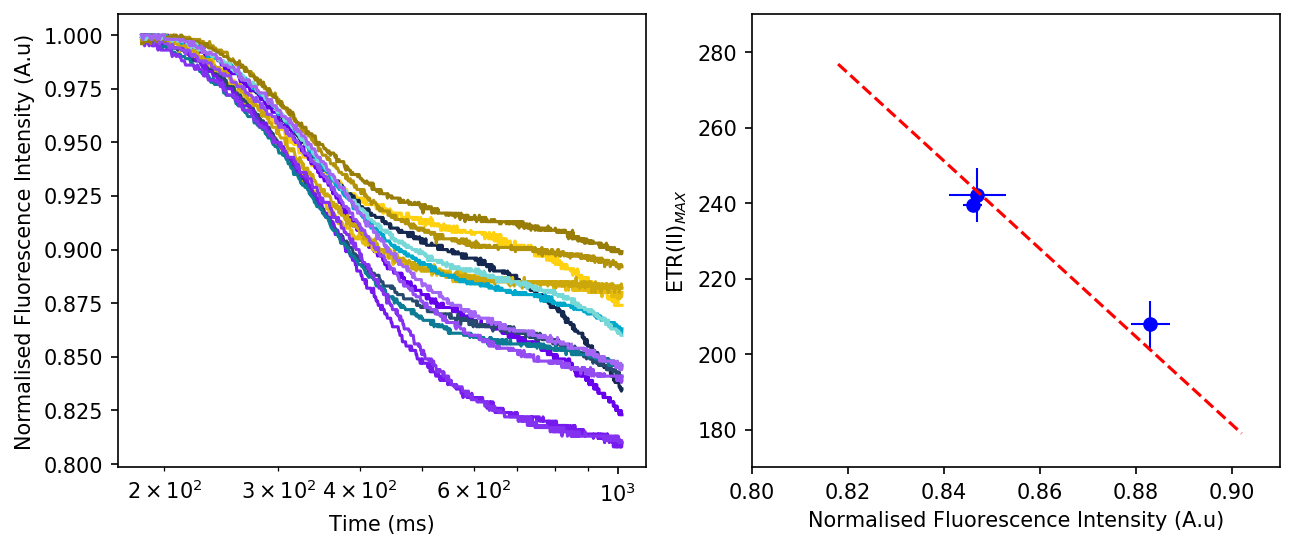

In [105]:
timeInterval = 1175
treatment_c = ["#f9dd3f", "#2282ce", "#d72bf7"]
blue_shade = ["#142850", "#27496d", "#0c7b93", "#00a8cc", "#77d8d8"]
yellow_shade = ["#ffd10f", "#e5bc0d", "#cca70c", "#b2920a", "#997d09"]
purple_shade = ["#6600ed", "#7519ee", "#8432f0", "#934cf2", "#a366f4"]

ojip_val = [0.883, 0.846, 0.847]
ojip_stdev = [0.004, 0.002, 0.006]
lc_val = [207.89, 239.46, 242.27]
lc_stdev = [6.25, 0.60, 7.11]

x_time = [float(s) for s in ojip_data["time_ojip"][0].split(",")]

x_vals = []
y_vals = []
for i in range(5):
    x_vals.append(whiteComb[i][1999])
    x_vals.append(rgbComb[i][1999])
    x_vals.append(rbComb[i][1999])
    y_vals.append(maxWhite[i])
    y_vals.append(maxRgb[i])
    y_vals.append(maxRb[i])

def line_fit(x):
    new_y = []
    for i in range(len(x)):
        new_y.append(x[i]*-1164.68 + 1229.57)
    return new_y

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=150)

for i in range(5):
    ax.plot(x_time[timeInterval:], whiteRep1[i][timeInterval:], color=yellow_shade[i])
    ax.plot(x_time[timeInterval:], rgbRep1[i][timeInterval:], color=blue_shade[i])
    ax.plot(x_time[timeInterval:], rbRep1[i][timeInterval:], color=purple_shade[i])
    ax2.errorbar(whiteComb[i][timePoint], maxWhite[i], xerr=whiteOjipStdev[i][timePoint], 
                 yerr=stdWhite[i], color=yellow_shade[i], marker="o")
    ax2.errorbar(rgbComb[i][timePoint], maxRgb[i], xerr=rgbOjipStdev[i][timePoint], 
                 yerr=stdRgb[i], color=blue_shade[i], marker="^") 
    ax2.errorbar(rbComb[i][timePoint], maxRb[i], xerr=rbOjipStdev[i][timePoint], 
                 yerr=stdRb[i], color=purple_shade[i], marker="s")
    
ax2.plot(np.arange(0.818, 0.902, 0.001), line_fit(np.arange(0.818, 0.902, 0.001)), "r--", zorder=10)
ax2.errorbar(ojip_val, lc_val, xerr=ojip_stdev, yerr=lc_stdev, color="b", linewidth=0, elinewidth=1, marker="o")

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Normalised Fluorescence Intensity (A.u)")
ax2.set_xlabel("Normalised Fluorescence Intensity (A.u)")
ax2.set_ylabel("ETR(II)$_{MAX}$")
ax.set_xscale("log")
ax2.set_ylim(170, 290)
ax2.set_xlim(0.8, 0.91)
#plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\NormF_ETRmax.png", dpi=300)

Text(0, 0.5, 'NPQ')

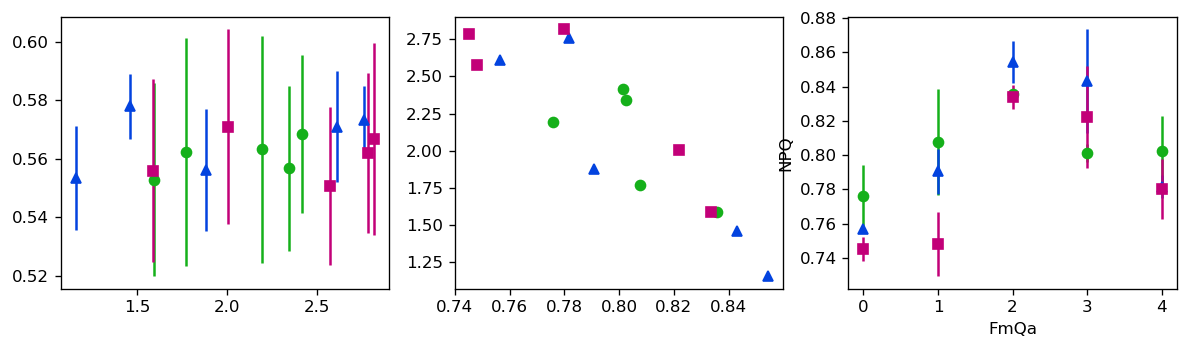

In [24]:
dates = ["2020/04/04 06:30", "2020/04/04 11:30", "2020/04/04 15:40", "2020/04/04 18:00", "2020/04/04 22:50"]
sigma_dates = ["2020/04/04 07:50", "2020/04/04 10:10", "2020/04/04 14:20", "2020/04/04 19:50", "2020/04/04 21:50"]
whiteValue, rgbValue, rbValue = [], [], []
whiteRep1, whiteRep2, whiteRep3 = [], [], []
rgbRep1, rgbRep2, rgbRep3 = [], [], []
rbRep1, rbRep2, rbRep3 = [], [], []

ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]

white_area = [2.193833333, 1.768166666, 1.5911666655, 2.417166667, 2.3421666670000003]
rgb_area = [2.6128333335000002, 1.8796666665, 1.156000002, 1.4598333349999997, 2.7603333325]
rb_area = [2.7838333345, 2.5749999975, 1.5891666665000002, 2.004333335, 2.8171666675]

colors = ["White", "RGB", "RB"]
checkedValues = ["Y(NPQ)", "Y(II)", "NPQ", "qN"]
possibleCorrelation = ["Y(II) = 20", "qP = 20"]

valueOfInterest = "Y(NO)"
valueOfInterest2 = "Y(NPQ)"
stdOfInterest = valueOfInterest + "StDev"
position = 20

reps = [1, 2, 3, 4, 5]
timePoint = 1999

maxWhite, maxRgb, maxRb = [], [], []
stdWhite, stdRgb, stdRb = [], [], []

colors1 = ["xkcd:green", "xkcd:blue", "xkcd:magenta"]

for rep in reps:
    for color in colors:
        lcSelection = lcdf.loc[(lcdf["Rep"] == rep) & (lcdf["Treatment"] == color)]
        lcSelection2 = lcdf.loc[(lcdf["Rep"] == rep) & (lcdf["Treatment"] == color)]
        lcStd = lcdf.loc[(lcdf["Rep"] == rep) & (lcdf["Treatment"] == color)]
        lcSelection = np.array(lcSelection[valueOfInterest])
        lcSelection2 = np.array(lcSelection2[valueOfInterest2])
        lcStd = np.array(lcStd[stdOfInterest])
        lcSelection = lcSelection[~np.isnan(lcSelection)]
        lcSelection2 = lcSelection2[~np.isnan(lcSelection2)]
        
        lcStd = lcStd[~np.isnan(lcStd)]
        if color == colors[0]:
            maxWhite.append(lcSelection[position])
            stdWhite.append(lcStd[position])
        if color == colors[1]:
            maxRgb.append(lcSelection[position])
            stdRgb.append(lcStd[position])
        if color == colors[2]:
            maxRb.append(lcSelection[position])
            stdRb.append(lcStd[position])

for i in range(len(ojipdf)):
    if ojipdf["sql_time"][i][:16] in sigma_dates:
        od = ojipdf["optical_density"][i]
        fm = ojipdf["fm"][i]
        fo = ojipdf["fo"][i]
        fj = ojipdf["fj"][i]
        fi = ojipdf["fi"][i]
        f_300us = ojipdf["f_300us"][i]
        fv = (fm - fo)
        fv_fm = fv / fm
        vj = (fj - fo) / fv
        mo = 4 * ((f_300us - fo) / fv)
        abs_rc = (mo / vj) / (1 - (fo / fm))
        Piabs = ((1 - (fo / fm)) / (mo / vj)) * (fv / fo) * ((1 - vj) / vj)
        fmqa = (fj - fo) / (fj)
        if ojipdf["Bottle_Num"][i] == str(1):
            whiteRep1.append(fmqa)
        if ojipdf["Bottle_Num"][i] == str(2):
            whiteRep2.append(fmqa)
        if ojipdf["Bottle_Num"][i] == str(3):
            whiteRep3.append(fmqa)
        if ojipdf["Bottle_Num"][i] == str(6):
            rgbRep1.append(fmqa)    
        if ojipdf["Bottle_Num"][i] == str(7):
            rgbRep2.append(fmqa)  
        if ojipdf["Bottle_Num"][i] == str(8):
            rgbRep3.append(fmqa)  
        if ojipdf["Bottle_Num"][i] == str(4):
            rbRep1.append(fmqa)
        if ojipdf["Bottle_Num"][i] == str(9):
            rbRep2.append(fmqa) 
        if ojipdf["Bottle_Num"][i] == str(10):
            rbRep3.append(fmqa)
    else:
        pass
    
def normalise_parameter(rep1, rep2, rep3):
    convert_rep1, convert_rep2, convert_rep3 = np.array(rep1), np.array(rep2), np.array(rep3)
    flatten_rep1, flatten_rep2, flatten_rep3 = convert_rep1.flatten(), convert_rep2.flatten(), convert_rep3.flatten()
    normalise_rep1, normalise_rep2, normalise_rep3 = [], [], []
    for i in range(len(flatten_rep1)):
        normalise_rep1.append(flatten_rep1[i] - flatten_rep1[0])
        normalise_rep2.append(flatten_rep2[i]- flatten_rep1[0])
        normalise_rep3.append(flatten_rep3[i]- flatten_rep1[0])  
    average_values = (np.array(normalise_rep1) + np.array(normalise_rep2) + np.array(normalise_rep3)) / 3
    stdev_values = []
    for i in range(len(normalise_rep1)):
        stdev_values.append(np.std([normalise_rep1[i], normalise_rep2[i], normalise_rep3[i]]))
    return average_values, stdev_values

white_parameters = normalise_parameter(whiteRep1, whiteRep2, whiteRep3)
rgb_parameters = normalise_parameter(rgbRep1, rgbRep2, rgbRep3)
rb_parameters = normalise_parameter(rbRep1, rbRep2, rbRep3)    
  
whiteValue = (np.array(whiteRep1) + np.array(whiteRep2) + np.array(whiteRep3)) / 3
rgbValue = (np.array(rgbRep1) + np.array(rgbRep2) + np.array(rgbRep3)) / 3
rbValue = (np.array(rbRep1) + np.array(rbRep2) + np.array(rbRep3)) / 3

whiteError, rgbError, rbError = [], [], []
for i in range(len(whiteRep1)):
    whiteError.append(np.std([whiteRep1[i], whiteRep2[i], whiteRep2[i]]))
    rgbError.append(np.std([rgbRep1[i], rgbRep2[i], rgbRep2[i]]))
    rbError.append(np.std([rbRep1[i], rbRep2[i], rbRep2[i]]))
    
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3), dpi=120)
for i in range(5):
    ax.errorbar(white_area[i], whiteValue[i], yerr=whiteError[i], color=colors1[0], marker="o") 
    ax.errorbar(rgb_area[i], rgbValue[i], yerr=rgbError[i], color=colors1[1], marker="^") 
    ax.errorbar(rb_area[i], rbValue[i], yerr=rbError[i], color=colors1[2], marker="s")
    
    ax1.errorbar(maxWhite[i], white_area[i], color=colors1[0], marker="o") 
    ax1.errorbar(maxRgb[i],rgb_area[i], color=colors1[1], marker="^") 
    ax1.errorbar(maxRb[i], rb_area[i], color=colors1[2], marker="s") 
    
    ax2.errorbar(i, maxWhite[i], yerr=stdWhite[i], color=colors1[0], marker="o") 
    ax2.errorbar(i, maxRgb[i], yerr=stdRgb[i], color=colors1[1], marker="^") 
    ax2.errorbar(i, maxRb[i], yerr=stdRb[i], color=colors1[2], marker="s") 

ax2.set_xlabel("FmQa")
ax2.set_ylabel("NPQ")